In [35]:
%matplotlib inline
from matplotlib import style
from matplotlib import figure
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [9]:
# Using the inspector to print the column names within the 'measurement' table and its types
measurement_columns = inspector.get_columns('measurement')

for each in measurement_columns:
    print(each['name'], each['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Using the inspector to print the column names within the 'station' table and its types
station_columns = inspector.get_columns('station')
for each in station_columns:
    print(each['name'], each['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f"Query Date: {query_date}")

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).all()

Query Date: 2016-08-23


In [33]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_scores, columns = ['date', 'prcp'])
prcp_df.set_index("date", inplace=True)

# Rename the column
prcp_df = prcp_df.rename(columns={'prcp':'precipitation'})

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(['date']).dropna()
prcp_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


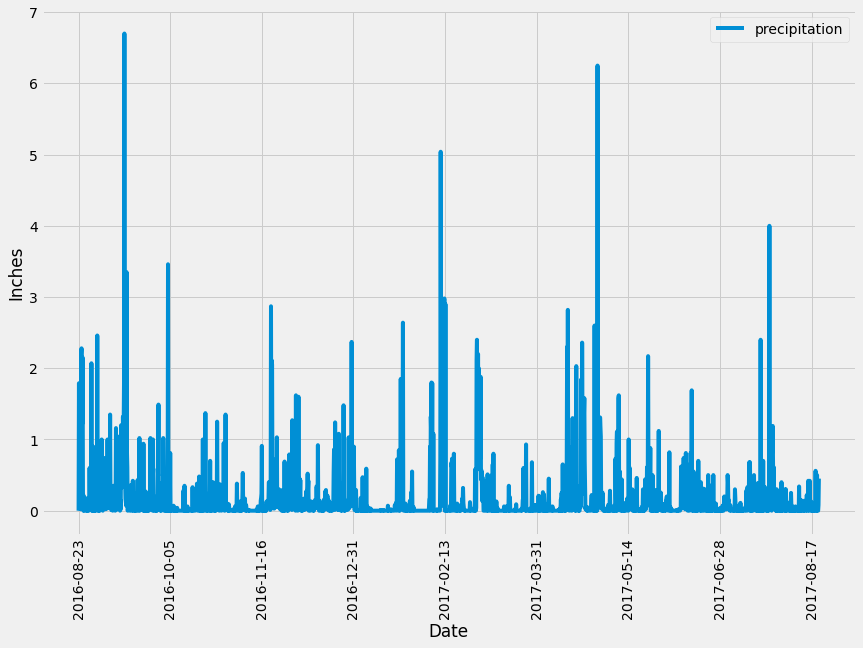

In [50]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(13,9), rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper right')
plt.show()

In [39]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.id).count()
print(f'Total Number of stations: {station_count}')

Total Number of stations: 9


In [59]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by((func.count(measurement.station)).desc()).all()
for each in active_stations:
    print(each)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
print(f'Most active station id: {most_active_station}')

session.query(func.min(measurement.tobs), 
              func.max(measurement.tobs), 
              func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()

Most active station id: USC00519281


[(54.0, 85.0, 71.66378066378067)]

In [73]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs_data = session.query(measurement.date, measurement.tobs).\
                            filter(measurement.date >= query_date).\
                            filter(measurement.station == most_active_station).all

temp_obs_data.head()

# Save the query results as a Pandas DataFrame and set the index to the date column
#temp_data_df = pd.DataFrame(temp_obs_data, columns = ['date', 'tobs'])
#temp_data_df


# Rename the column
#prcp_df = prcp_df.rename(columns={'prcp':'precipitation'})


AttributeError: 'function' object has no attribute 'head'

# Close session

In [ ]:
# Close Session
session.close()